In [ ]:
'''
This script takes the csv files  and filters out the words which are not present in UMLS.
'''

import argparse
from quickumls import QuickUMLS
import pandas as pd
import glob


umls_path = '/Users/gunjanbalde/Documents/QuickUMLS_Files/'
matcher = QuickUMLS(umls_path,similarity_name='cosine',threshold=0.95) 

In [ ]:
from collections import defaultdict
counter_PAC = defaultdict(int)
for csv_path in ['../../../../TxtInputFiles/PAC_input.txt']:

    print(f'Starting for {csv_path}.....')
    lines_PAC = open(csv_path).readlines()

    for idx,abs in enumerate(lines_PAC):
        if idx%100 == 0: print(f'Processed till {idx+1}... {len(counter_PAC)} are considered till now.')

        flag = 0
        d = matcher.match(abs, best_match=True, ignore_syntax=False)
        if len(d) == 0:
            continue
        
        else:
            for l in d:
                counter_PAC[l[0]['ngram']] += 1
                
    if idx%10000 == 0: print(f'Processed till {idx+1}... {len(counter_PAC)} are considered till now.')

    # df.to_csv('./%sWithConsiderFlag_AllSemTypes.csv'%csv_path.split('/')[-1][:-4],index=False)

In [ ]:
import pandas as pd

list_tokens = list(counter_PAC.keys())
val_tokens = list(counter_PAC.values())


In [ ]:
df = pd.DataFrame({'Tokens':list_tokens,'Count':val_tokens})
df.to_csv('PAC_Tokens.csv',index=False)

In [ ]:
import numpy as np
np.percentile(val_tokens,[0,10,25,50,75,90,95,90,100])

In [ ]:
from collections import defaultdict
import json
counter_PAC = defaultdict(int)
for csv_path in ['./pubmedqa/data/pqal_fold0/train_set.json']:

    print(f'Starting for {csv_path}.....')
    lines_PAC = json.loads(open(csv_path).read())
    
    lines_PAC = [' '.join(lines_PAC[x]['CONTEXTS']) for x in lines_PAC]

    for idx,abs in enumerate(lines_PAC):
        if idx%100 == 0: print(f'Processed till {idx+1}... {len(counter_PAC)} are considered till now.')

        flag = 0
        d = matcher.match(abs, best_match=True, ignore_syntax=False)
        if len(d) == 0:
            continue
        
        else:
            for l in d:
                counter_PAC[l[0]['ngram']] += 1
                
    if idx%100 == 0: print(f'Processed till {idx+1}... {len(counter_PAC)} are considered till now.')

    # df.to_csv('./%sWithConsiderFlag_AllSemTypes.csv'%csv_path.split('/')[-1][:-4],index=False)

In [ ]:
import pandas as pd

list_tokens = list(counter_PAC.keys())
val_tokens = list(counter_PAC.values())

df = pd.DataFrame({'Tokens':list_tokens,'Count':val_tokens})
df.to_csv('PubMedQA_Tokens.csv',index=False)

In [1]:
import pandas as pd
df_PAC = pd.read_csv('PAC_Tokens.csv')
df_BioASQ = pd.read_csv('PubMedQA_Tokens.csv')

df_BioASQ

,Tokens,Count
0,white blood cell count,2
1,maternal infection,1
2,chorioamnionitis,5
3,medical records,7
4,retrospective,31
...,...,...
6664,Tumor size,1
6665,prognoses,1
6666,Korean,5
6667,DSS,3


In [2]:
df_BioASQ['Count'].describe()

count    6669.000000
mean        4.666967
std        17.172086
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max      1038.000000
Name: Count, dtype: float64

In [3]:
from collections import defaultdict
tokens_PAC = df_PAC.set_index('Tokens')['Count'].to_dict()
tokens_PAC_words = defaultdict(int)

tokens_BioASQ = df_BioASQ.set_index('Tokens')['Count'].to_dict()
tokens_BioASQ_words = defaultdict(int)

import re
pattern = r"^[A-Za-z▁]+$"

for key,val in tokens_PAC.items():
    try:
      for word in key.split():  
        if re.match(pattern,word.strip()):
            tokens_PAC_words[word] += val
    except: pass
  
for key,val in tokens_BioASQ.items():
    try:
      for word in key.split():  
        if re.match(pattern,word.strip()):
            tokens_BioASQ_words[word] += val
    except: pass


In [4]:
df_tokens_PAC_words = pd.DataFrame(list(tokens_PAC_words.items()), columns=['Word', 'Count'])
print(df_tokens_PAC_words)

df_BioASQ_words = pd.DataFrame(list(tokens_BioASQ_words.items()), columns=['Word', 'Count'])
print(df_BioASQ_words)

                     Word  Count
0                Yersinia    387
1          enterocolitica    155
2           agglutination   1261
3                reaction  30928
4              rheumatoid   2403
...                   ...    ...
81111  choledochoduodenal      1
81112           mabuterol      3
81113              Varroa      1
81114           jacobsoni      1
81115           anopheles      1

[81116 rows x 2 columns]
             Word  Count
0           white     24
1           blood     85
2            cell     31
3           count     15
4        maternal     24
...           ...    ...
5409  neoadjuvant      1
5410    prognoses      1
5411       Korean      5
5412          DSS      3
5413          MTG      2

[5414 rows x 2 columns]


In [5]:
top_50_percent_PAC = df_tokens_PAC_words.nlargest(int(len(df_tokens_PAC_words) * 0.5), 'Count')
top_50_percent_BioASQ = df_BioASQ_words.nlargest(int(len(df_BioASQ_words) * 0.5), 'Count')

print(top_50_percent_PAC)
print(top_50_percent_BioASQ)

                Word   Count
240            cells  406536
29          patients  393424
262             cell  221685
106             less  204305
438         activity  184463
...              ...     ...
37410  Doxifluridine       7
37421        Boolean       7
37435        Synexin       7
37450         Helmet       7
37474       kemptide       7

[40558 rows x 2 columns]
              Word  Count
46        patients   1051
74           study    417
78           group    380
104          years    232
91     significant    197
...            ...    ...
2361     universal      2
2368      monocyte      2
2373  Histological      2
2375  subcutaneous      2
2377   macrophages      2

[2707 rows x 2 columns]


In [6]:
from transformers import AutoTokenizer

tokenier = AutoTokenizer.from_pretrained('mistralai/Mistral-7B-v0.1')

In [7]:
top_50_percent_BioASQ['Splits'] = top_50_percent_BioASQ['Word'].apply(lambda x: len(tokenier.tokenize(x)))
top_50_percent_PAC['Splits'] = top_50_percent_PAC['Word'].apply(lambda x: len(tokenier.tokenize(x)))


In [8]:
top_50_percent_PAC_3 = top_50_percent_PAC[top_50_percent_PAC['Splits'] > 3]
top_50_percent_BioASQ_3 = top_50_percent_BioASQ[top_50_percent_BioASQ['Splits'] > 3]

lookup_table_3 = top_50_percent_BioASQ_3[top_50_percent_BioASQ_3['Word'].isin(top_50_percent_PAC_3['Word'])]
lookup_table_3.to_csv('lookup_table_EBM_SplitMoreThan3.csv',index=False)

In [9]:
top_50_percent_PAC_2 = top_50_percent_PAC[top_50_percent_PAC['Splits'] > 2]
top_50_percent_BioASQ_2 = top_50_percent_BioASQ[top_50_percent_BioASQ['Splits'] > 2]

lookup_table_2 = top_50_percent_BioASQ_2[top_50_percent_BioASQ_2['Word'].isin(top_50_percent_PAC_2['Word'])]
lookup_table_2.to_csv('lookup_table_EBM_SplitMoreThan2.csv',index=False)

In [10]:
top_50_percent_PAC_1 = top_50_percent_PAC[top_50_percent_PAC['Splits'] > 1]
top_50_percent_BioASQ_1 = top_50_percent_BioASQ[top_50_percent_BioASQ['Splits'] > 1]

lookup_table_1 = top_50_percent_BioASQ_1[top_50_percent_BioASQ_1['Word'].isin(top_50_percent_PAC_1['Word'])]
lookup_table_1.to_csv('PubMedQA_SplitMoreThan1_OOV.csv',index=False)

In [ ]:
import os
os.mkdir('./EBM_Lookup_SplitMoreThan3')
os.mkdir('./EBM_Lookup_SplitMoreThan2')


In [11]:
import pandas as pd
import os

lookup_table_1 = pd.read_csv('./PubMedQA_SplitMoreThan1_OOV.csv')
lookup_table_words_1 = lookup_table_1['Word'].to_list()

# os.mkdir('./BioASQ_Lookup_SplitMoreThan1_Add')

# for i in range(50,501,50):
#     print(i)
#     dump_words = lookup_table_words_1[:i]#[:i+500]
#     with open(f'EBM_Lookup_SplitMoreThan1/EBM_Lookup_{i}.txt','w') as f: #{i+500}.txt','w') as f:
#         f.write('\n'.join([f'''▁{x}\t{-32000-idx}''' for idx,x in enumerate(dump_words)]))
#         f.write('\n')
#     f.close()
    
# lookup_table_words_2 = lookup_table_2['Word'].to_list()
# for i in [50,100,200,500,1000,1500,2000]:
#     print(i)
#     dump_words = lookup_table_words_2[:i]
#     with open(f'EBM_Lookup_SplitMoreThan2/EBM_Lookup_{i}.txt','w') as f: #{i+500}.txt','w') as f:
#         f.write('\n'.join([f'''▁{x}\t{-32000-idx}''' for idx,x in enumerate(dump_words)]))
#         f.write('\n')
#     f.close()

# lookup_table_words_3 = lookup_table_3['Word'].to_list()
# for i in [50,100,200,500,1000,1500,2000]: 
#     print(i)
#     dump_words = lookup_table_words_3[:i]
#     with open(f'EBM_Lookup_SplitMoreThan3/EBM_Lookup_{i}.txt','w') as f: #{i+500}.txt','w') as f:
#         f.write('\n'.join([f'''▁{x}\t{-32000-idx}''' for idx,x in enumerate(dump_words)]))
#         f.write('\n')
#     f.close()

In [13]:
from collections import defaultdict

# os.mkdir('./PubMedQA_Lookup_SplitMoreThan1_Also_Add_As_Subwords')


for i in range(50,501,50):
    dump_words = lookup_table_words_1[:i]
    list_words_to_add = defaultdict(list)
    for word1 in dump_words:
        list_words_to_add[f'▁{word1}'].append(word1)
        for word2 in lookup_table_words_1:
            if word2.startswith(word1) and word1 != word2:
                list_words_to_add[f'▁{word1}'].append(word2)
                continue
            if word1 != word2 and word1 in word2 and not word2.startswith(word1):
                list_words_to_add[word1].append(word2)
            
    print(i,len(list_words_to_add))
    dump_words = list(list_words_to_add.keys()) 
    with open(f'PubMedQA_Lookup_SplitMoreThan1_Also_Add_As_Subwords/PubMedQA_Lookup_{i}.txt','w') as f: #{i+500}.txt','w') as f:
        f.write('\n'.join([f'''{x}\t{-32000-idx}''' for idx,x in enumerate(dump_words)]))
        f.write('\n')
    f.close()

50 51
100 105
150 156
200 213
250 266
300 319
350 372
400 424
450 475
500 526


In [ ]:
list_words_to_add

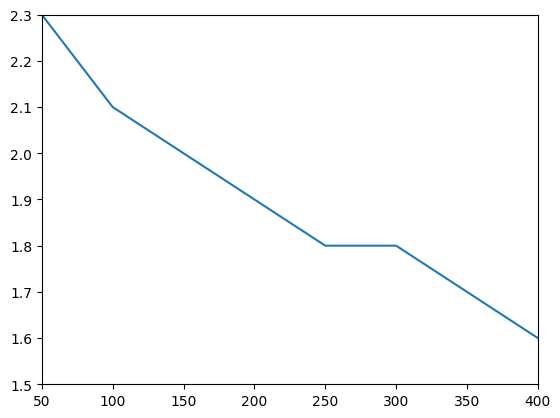

In [14]:
x = [50,100,150,200,250,300,350,400]
y= [2.32,2.15,2.03,1.93,1.83,1.75,1.67,1.6]

from matplotlib import pyplot as plt
y_r = [round(i,1) for i in y]
plt.plot(x,y_r)
plt.ylim(1.5,2.3)
plt.xlim(50,400)
plt.show()

In [ ]:
y_r